# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#url for api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
#build partial query URL
query_url = url + "&appid=" + weather_api_key

#create lists for try/except loop
city = []
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []

#loop through 
print("-----------------------------------------------------")
print("beginning Data Retrieval")
print("-----------------------------------------------------")

for x in range(len(cities)):
    try:
        response = requests.get(query_url + "&q=" + cities[x]).json()
        city.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing City {x + 1} | {cities[x]}")
    except KeyError:
        print(f"Data missing for {cities[x]}, skipping...")
print("-----------------------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------------------")

-----------------------------------------------------
beginning Data Retrieval
-----------------------------------------------------
Processing City 1 | bay city
Processing City 2 | port hedland
Processing City 3 | albany
Processing City 4 | mataura
Processing City 5 | chuy
Processing City 6 | rikitea
Processing City 7 | cadillac
Processing City 8 | new norfolk
Processing City 9 | tual
Processing City 10 | cape town
Processing City 11 | inuvik
Processing City 12 | aktau
Processing City 13 | nantucket
Processing City 14 | nikolskoye
Processing City 15 | saint-pierre
Processing City 16 | padang
Processing City 17 | khatanga
Data missing for saleaula, skipping...
Processing City 19 | hasaki
Processing City 20 | ribeira grande
Processing City 21 | coquimbo
Processing City 22 | srednekolymsk
Processing City 23 | los llanos de aridane
Processing City 24 | bambous virieux
Processing City 25 | mar del plata
Processing City 26 | alugan
Processing City 27 | padilla
Processing City 28 | castro
Pr

Processing City 255 | brezice
Processing City 256 | chokurdakh
Processing City 257 | santa rosa
Processing City 258 | bowen
Data missing for metehara, skipping...
Processing City 260 | praia da vitoria
Processing City 261 | beyneu
Processing City 262 | popondetta
Processing City 263 | leningradskiy
Processing City 264 | darhan
Processing City 265 | severo-yeniseyskiy
Processing City 266 | maraa
Processing City 267 | soldotna
Processing City 268 | colesville
Processing City 269 | sayyan
Processing City 270 | pombia
Processing City 271 | lorengau
Processing City 272 | maceio
Processing City 273 | shebunino
Processing City 274 | haines junction
Processing City 275 | half moon bay
Processing City 276 | altay
Processing City 277 | tazovskiy
Data missing for karaul, skipping...
Processing City 279 | kerrobert
Processing City 280 | rajapur
Processing City 281 | arlit
Data missing for ituni, skipping...
Processing City 283 | abalak
Processing City 284 | yen bai
Processing City 285 | hualmay
Pr

Processing City 512 | ochamchira
Processing City 513 | asosa
Processing City 514 | elmadag
Processing City 515 | tame
Processing City 516 | coos bay
Processing City 517 | ordzhonikidze
Processing City 518 | kuusamo
Processing City 519 | morant bay
Processing City 520 | orsk
Processing City 521 | lazaro cardenas
Processing City 522 | tsaratanana
Processing City 523 | simeykyne
Processing City 524 | barcelos
Data missing for kawana waters, skipping...
Processing City 526 | malinovoye ozero
Processing City 527 | manica
Processing City 528 | rivera
Processing City 529 | candido mota
Data missing for chagda, skipping...
Processing City 531 | thunder bay
Processing City 532 | kailua
Processing City 533 | vardo
Processing City 534 | liuhe
Processing City 535 | mareeba
Processing City 536 | shingu
Processing City 537 | broome
Processing City 538 | sakaiminato
Processing City 539 | mana
Processing City 540 | kidal
Processing City 541 | noshiro
Processing City 542 | kimbe
Processing City 543 | e

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#convert city data into DataFrame

city_df = pd.DataFrame({"City": city,
                       "Lat": latitude,
                       "Lng": longitude,
                       "Max Temp": temperature,
                       "Humidity": humidity,
                       "Cloudiness":clouds,
                       "Wind Speed": wind})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bay City,43.5945,-83.8889,57.52,38,1,14.97
1,Port Hedland,-20.3167,118.5667,75.20,88,5,4.61
2,Albany,42.6001,-73.9662,63.48,45,75,1.99
3,Mataura,-46.1927,168.8643,52.00,93,100,7.00
4,Chui,-33.6971,-53.4616,60.44,75,0,4.47
...,...,...,...,...,...,...,...
552,Vila Franca do Campo,37.7167,-25.4333,60.80,94,75,16.11
553,Tuxpan,19.5500,-103.4000,84.20,54,20,11.50
554,Skjervøy,70.0311,20.9714,33.80,64,100,16.78
555,Yate,51.5407,-2.4184,40.77,81,81,3.44


In [13]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,21.651735,20.280722,58.097325,70.581688,53.016158,8.056373
std,32.739298,90.394109,22.218214,22.513846,38.311316,5.669133
min,-54.800000,-175.200000,-9.510000,6.000000,0.000000,0.130000
25%,-5.198900,-60.145800,40.770000,59.000000,16.000000,3.620000
50%,23.600000,26.400000,62.600000,77.000000,59.000000,6.890000
75%,48.812500,100.404600,77.000000,87.000000,90.000000,11.050000
max,78.218600,179.316700,102.040000,100.000000,100.000000,34.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
humidity_df = city_df.loc[city_df["Humidity"] > 100]

humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [15]:
#  Get the indices of cities that have humidity over 100%.

# there are no cities with a humidity over 100

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


clean_city_data = city_df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bay City,43.5945,-83.8889,57.52,38,1,14.97
1,Port Hedland,-20.3167,118.5667,75.20,88,5,4.61
2,Albany,42.6001,-73.9662,63.48,45,75,1.99
3,Mataura,-46.1927,168.8643,52.00,93,100,7.00
4,Chui,-33.6971,-53.4616,60.44,75,0,4.47
...,...,...,...,...,...,...,...
552,Vila Franca do Campo,37.7167,-25.4333,60.80,94,75,16.11
553,Tuxpan,19.5500,-103.4000,84.20,54,20,11.50
554,Skjervøy,70.0311,20.9714,33.80,64,100,16.78
555,Yate,51.5407,-2.4184,40.77,81,81,3.44


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

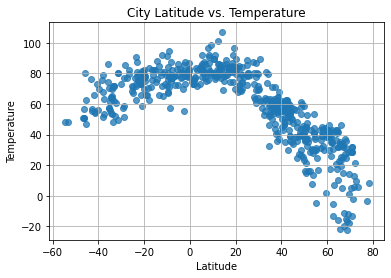

In [30]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

## Latitude vs. Humidity Plot

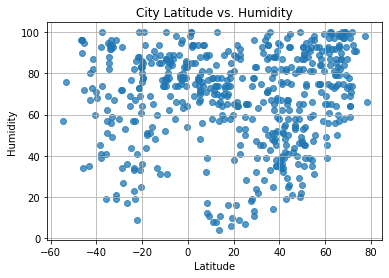

In [32]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

## Latitude vs. Cloudiness Plot

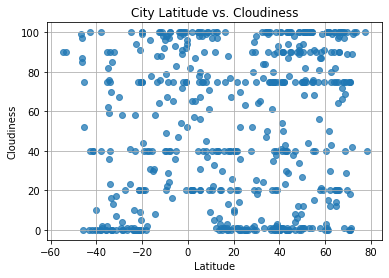

In [34]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

## Latitude vs. Wind Speed Plot

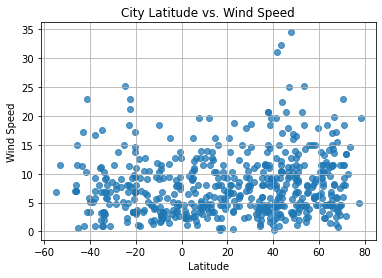

In [38]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

plt.scatter(x_values,y_values, alpha = .75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

## Linear Regression

In [29]:
city_nh = clean_city_data.loc[clean_city_data["Lat"]>=0]
city_sh = clean_city_data.loc[clean_city_data["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


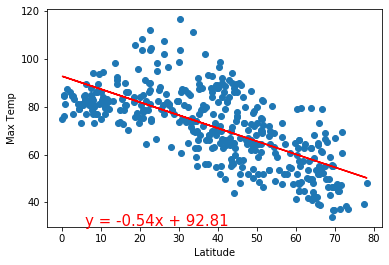

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


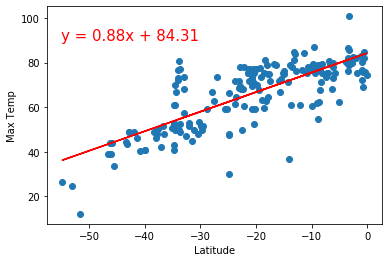

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


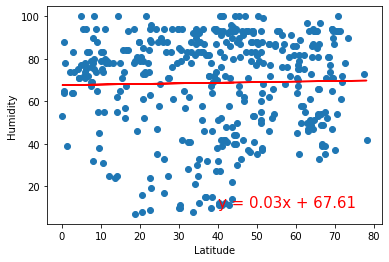

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


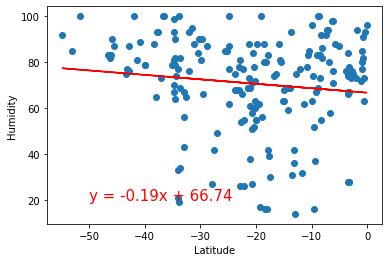

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


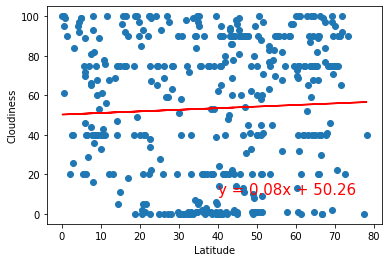

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


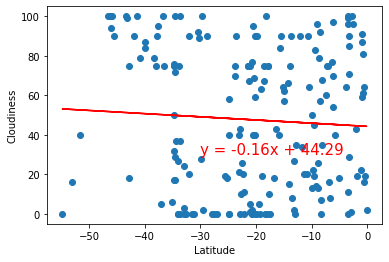

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


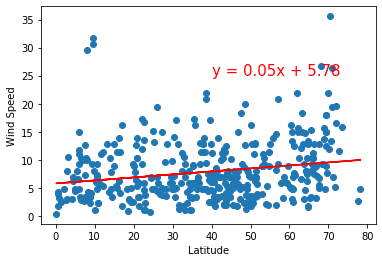

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


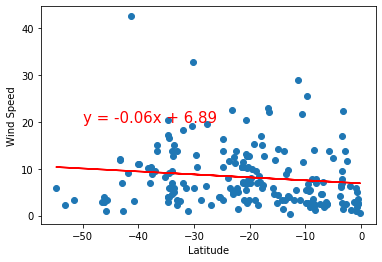